<a href="https://colab.research.google.com/github/Anshad-Aziz/Customer_Segmentation/blob/main/Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

DATA PREPROCESSING

In [2]:
data=pd.read_csv("Dataset.csv")

In [3]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64

In [4]:
print("Dataset Head:")
print(data.head())

Dataset Head:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749           0.818182  ...        139.509787          0.000000      12
1  C10002  3202.467416           0.909091  ...       1072.340217          0.222222      12
2  C10003  2495.148862           1.000000  ...        627.284787          0.000000      12
3  C10004  1666.670542           0.636364  ...               NaN          0.000000      12
4  C10005   817.714335           1.000000  ...        244.791237          0.000000      12

[5 rows x 18 columns]


In [5]:
data_cleaned=data.drop(columns=['CUST_ID'])

In [6]:
imputer=SimpleImputer(strategy='median')
data_cleaned[['CREDIT_LIMIT','MINIMUM_PAYMENTS']]=imputer.fit_transform(data_cleaned[['CREDIT_LIMIT','MINIMUM_PAYMENTS']])

In [7]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data_cleaned)

In [8]:
scaled_df=pd.DataFrame(scaled_data,columns=data_cleaned.columns)

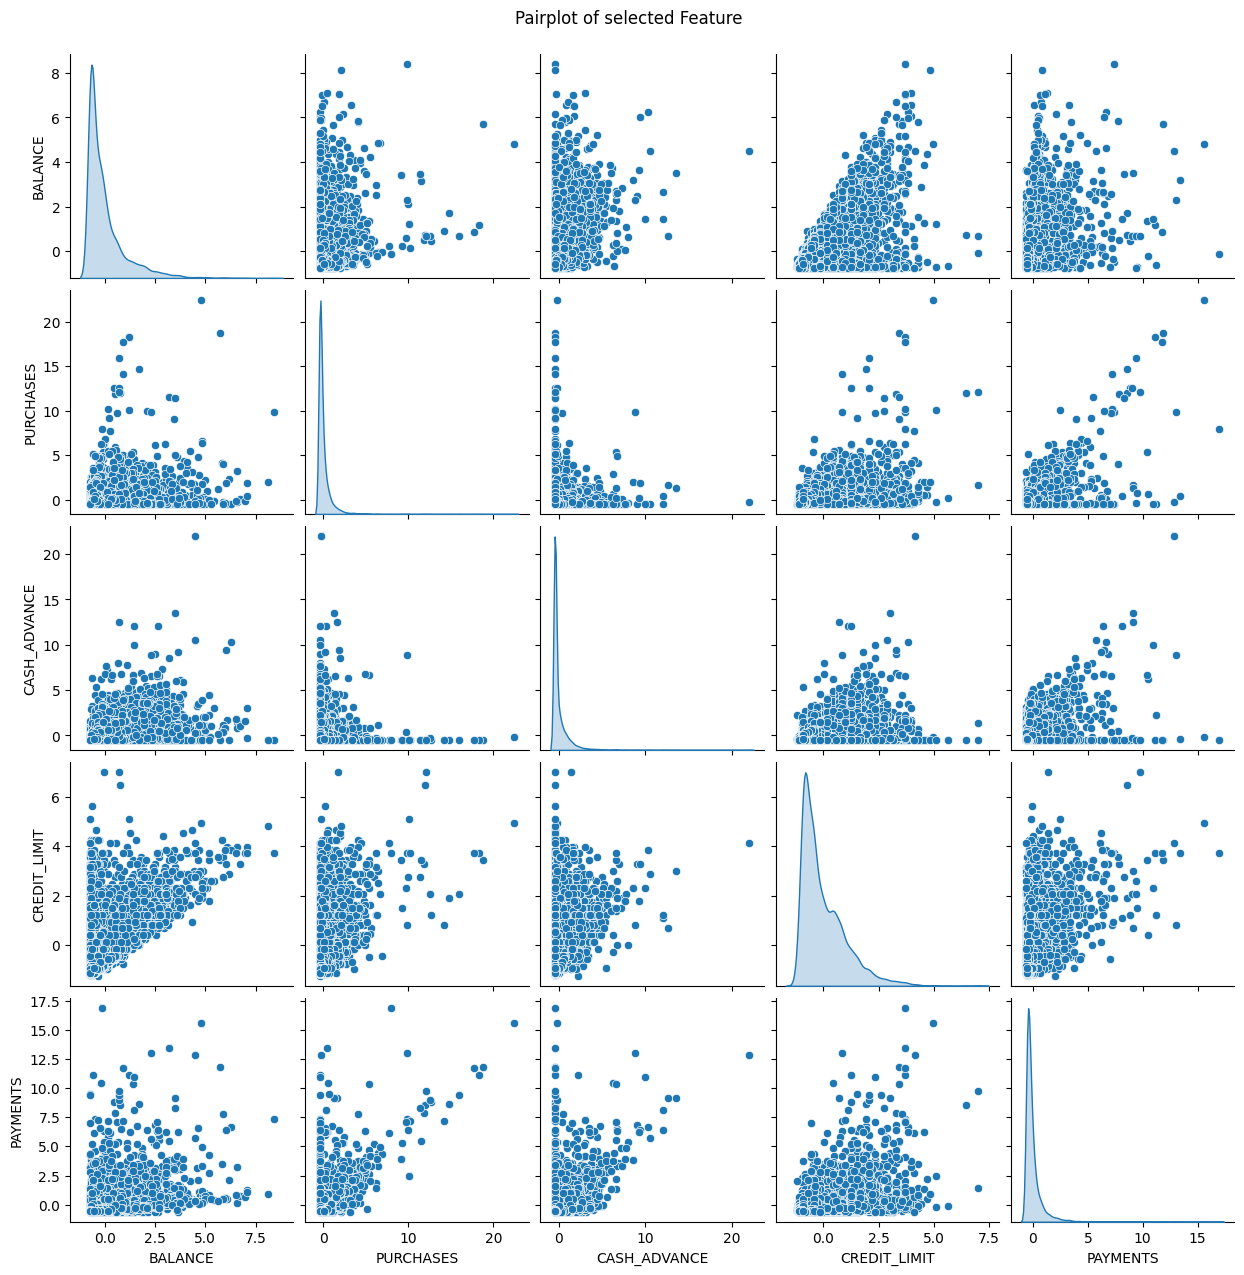

In [9]:
selected_features=['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
sns.pairplot(scaled_df[selected_features],diag_kind='kde')
plt.suptitle('Pairplot of selected Feature',y=1.02)
plt.show()

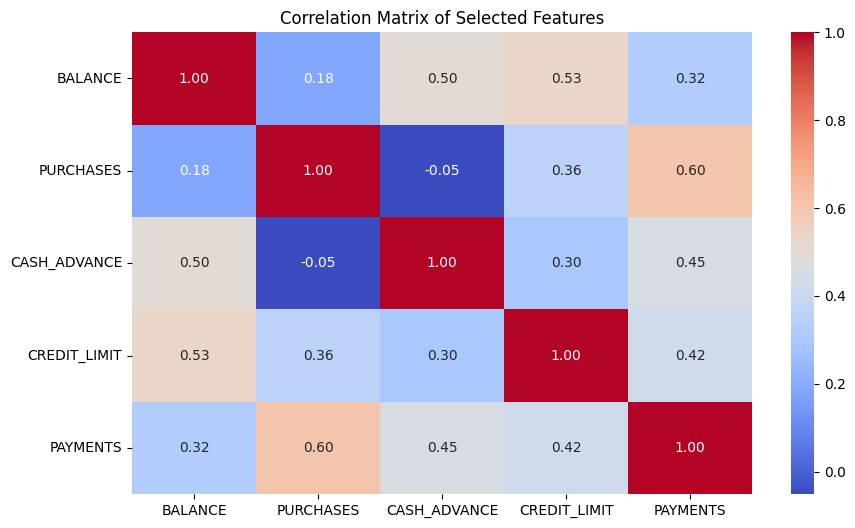

In [10]:
plt.figure(figsize=(10,6))
corr_matrix=scaled_df[selected_features].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [16]:
inertia=[]
K=range(1,11)
for k in K:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_df)
  inertia.append(kmeans.inertia_)

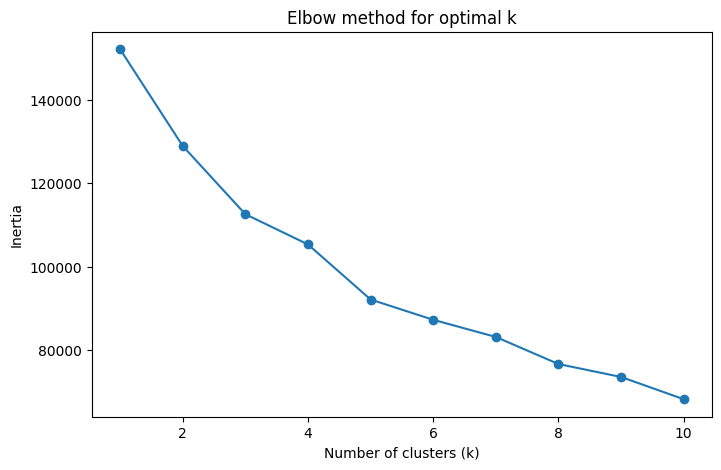

In [18]:
plt.figure(figsize=(8,5))
plt.plot(K,inertia,marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel("Inertia")
plt.title('Elbow method for optimal k')
plt.show()

In [20]:
kmeans=KMeans(n_clusters=4,random_state=42)
cluster_kmeans=kmeans.fit_predict(scaled_df)

In [21]:
silhouette_kmeans=silhouette_score(scaled_df,cluster_kmeans)
print(f"silhouette score for k means:{silhouette_kmeans}")

silhouette score for k means:0.1664601900140412


In [22]:
dbscan=DBSCAN(eps=1.5,min_samples=5)
cluster_dbscan=dbscan.fit_predict(scaled_df)

In [23]:
silhouette_dbscan=silhouette_score(scaled_df,cluster_dbscan)
print(f"silhouette score for DBSCAN:{silhouette_dbscan}")

silhouette score for DBSCAN:0.0007039585239215523


In [26]:
data_cleaned['Cluster_KMeans']=cluster_kmeans
cluster_profiles=data_cleaned.groupby('Cluster_KMeans').mean()
print("Cluster Profiles (K-Means):")
print(cluster_profiles)

Cluster Profiles (K-Means):
                    BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT     TENURE
Cluster_KMeans                                  ...                             
0               5010.394668           0.966663  ...          0.040025  11.416581
1                108.430006           0.412096  ...          0.253704  11.217888
2               1253.817942           0.974758  ...          0.282970  11.729314
3               1495.324927           0.966467  ...          0.022886  11.482482

[4 rows x 17 columns]


In [27]:
for i, profile in cluster_profiles.iterrows():
    if profile['BALANCE'] > 1.0:
        print(f"Cluster {i}: High balance, target with premium offers.")
    elif profile['CASH_ADVANCE'] > 0.5:
        print(f"Cluster {i}: High cash advance users, offer better cash advance rates.")
    else:
        print(f"Cluster {i}: Regular users, promote credit card offers.")

Cluster 0: High balance, target with premium offers.
Cluster 1: High balance, target with premium offers.
Cluster 2: High balance, target with premium offers.
Cluster 3: High balance, target with premium offers.


In [28]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

In [29]:
kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters_kmeans_pca = kmeans_pca.fit_predict(pca_data)

In [30]:
silhouette_kmeans_pca = silhouette_score(pca_data, clusters_kmeans_pca)
print(f"Silhouette Score after PCA for K-Means: {silhouette_kmeans_pca}")

Silhouette Score after PCA for K-Means: 0.40740291225352293


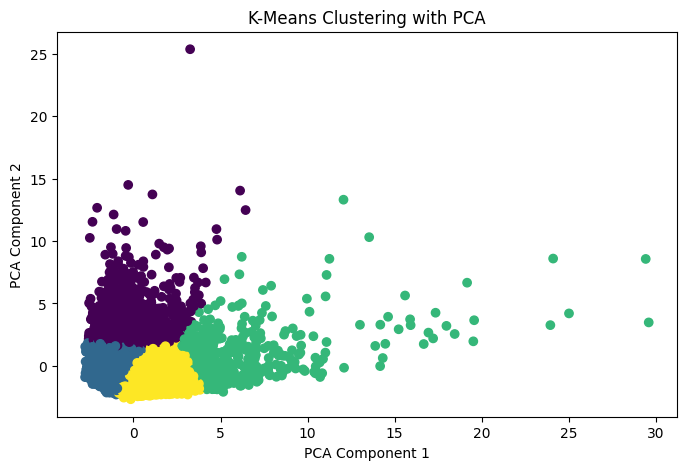

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_kmeans_pca, cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [32]:
cluster_profiles.to_csv('cluster.csv')